In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_daily_weather = pd.read_csv('CBS_2021-2023_Daily_Weather.csv')
df_hourly_weather = pd.read_csv('CBS_2021-2023_Hourly_Weather.csv')


### Context

Capital bike share project. First step: investigating aggregated DAILY weather and HOURLY weather data. 

In [3]:
df_daily_weather.head()

,Casual,Date,Member,Total_rides,apparent_temperature_mean (°C),temperature_2m_mean (°C),weathercode (wmo code),windspeed_10m_max (km/h)
0,371,2021-01-01,590,961,-0.9,2.3,63,10.6
1,2874,2021-01-02,2844,5718,4.8,7.6,61,19.1
2,495,2021-01-03,1133,1628,0.9,3.9,63,13.0
3,907,2021-01-04,2074,2981,1.0,4.1,3,13.3
4,1057,2021-01-05,2004,3061,1.4,4.0,51,9.2


### Features - for DAILY data

- **Casual**	= Integer [unclear what it means], in what range?
- **Date**	
- **Member**	= Number of users?
- **Total_rides**
- **apparent_temperature_mean (°C)**
- **temperature_2m_mean (°C)**
- **weathercode (wmo code)**
- **windspeed_10m_max (km/h)**

- **HeartDisease** : output class [1: heart disease, 0: Normal]  

In [4]:
df_hourly_weather.head()

,Casual,Date,Hour,Member,Total_rides,relativehumidity_2m (%),temperature_2m (°C),weathercode (wmo code),windspeed_10m (km/h)
0,20.0,2021-01-01,0,26.0,46.0,90,2.4,1,10.2
1,23.0,2021-01-01,1,23.0,46.0,88,1.8,1,10.0
2,20.0,2021-01-01,2,28.0,48.0,87,1.1,2,10.1
3,9.0,2021-01-01,3,7.0,16.0,81,1.6,2,10.6
4,7.0,2021-01-01,4,5.0,12.0,77,1.6,2,9.9


### Features - for HOURLY data

- **Casual**	= Integer, [Number of users without membership subscription]
- **Date**      = Object, 
- **Hour**	    = Integer, [0 - 23]
- **Member**	= Float, [Number of users with membership subscription]
- **Total_rides**               = XX []
- **relativehumidity_2m (%)**   = XX []
- **temperature_2m_mean (°C)**  = XX []
- **weathercode (wmo code)**    = XX [00-99]
- **windspeed_10m (km/h)**      = Why no MAX here? Same as in other dataset?

- **HeartDisease** : output class [1: heart disease, 0: Normal]  

In [5]:
df_daily_weather.dtypes

# observation: "Casual" & "Total_rides") are int64, but it should be float64?
# date: Object -> change to datetime

Casual                              int64
Date                               object
Member                              int64
Total_rides                         int64
apparent_temperature_mean (°C)    float64
temperature_2m_mean (°C)          float64
weathercode (wmo code)              int64
windspeed_10m_max (km/h)          float64
dtype: object

In [6]:
# Fill missing values in 'Casual' column with 0 before converting to int64
df_hourly_weather['Casual'] = df_hourly_weather['Casual'].fillna(0).astype('int64')

In [7]:
df_hourly_weather.dtypes

Casual                       int64
Date                        object
Hour                         int64
Member                     float64
Total_rides                float64
relativehumidity_2m (%)      int64
temperature_2m (°C)        float64
weathercode (wmo code)       int64
windspeed_10m (km/h)       float64
dtype: object

In [8]:
df_daily_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Casual                          1095 non-null   int64  
 1   Date                            1095 non-null   object 
 2   Member                          1095 non-null   int64  
 3   Total_rides                     1095 non-null   int64  
 4   apparent_temperature_mean (°C)  1095 non-null   float64
 5   temperature_2m_mean (°C)        1095 non-null   float64
 6   weathercode (wmo code)          1095 non-null   int64  
 7   windspeed_10m_max (km/h)        1095 non-null   float64
dtypes: float64(3), int64(4), object(1)
memory usage: 68.6+ KB


In [9]:
df_hourly_weather.info()

# 11 rows with missing data? Variance between 26.280 and 26.269 non-nulls

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26280 entries, 0 to 26279
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Casual                   26280 non-null  int64  
 1   Date                     26280 non-null  object 
 2   Hour                     26280 non-null  int64  
 3   Member                   26269 non-null  float64
 4   Total_rides              26269 non-null  float64
 5   relativehumidity_2m (%)  26280 non-null  int64  
 6   temperature_2m (°C)      26280 non-null  float64
 7   weathercode (wmo code)   26280 non-null  int64  
 8   windspeed_10m (km/h)     26280 non-null  float64
dtypes: float64(4), int64(4), object(1)
memory usage: 1.8+ MB


In [10]:
df_daily_weather.describe().T


,count,mean,std,min,25%,50%,75%,max
Casual,1095.0,3836.715068,2114.895305,174.0,2122.00,3595.0,5321.00,12839.0
Member,1095.0,5929.492237,2419.273171,323.0,4292.50,5848.0,7577.00,12580.0
Total_rides,1095.0,9766.207306,4129.630135,497.0,6741.50,9759.0,13020.00,20174.0
apparent_temperature_mean (°C),1095.0,12.836438,11.889420,-15.2,2.70,13.1,23.40,34.7
temperature_2m_mean (°C),1095.0,14.412785,9.667675,-9.1,6.25,14.9,22.75,34.7
weathercode (wmo code),1095.0,24.391781,27.774440,0.0,1.00,3.0,53.00,75.0
windspeed_10m_max (km/h),1095.0,16.051050,5.880358,5.6,11.70,14.7,19.40,40.1


In [11]:
df_hourly_weather.describe().T

,count,mean,std,min,25%,50%,75%,max
Casual,26280.0,159.863128,167.327384,0.0,28.00,105.0,236.00,1206.0
Hour,26280.0,11.500000,6.922318,0.0,5.75,11.5,17.25,23.0
Member,26269.0,247.165632,225.283539,0.0,55.00,203.0,371.00,1534.0
Total_rides,26269.0,407.095702,373.005409,1.0,85.00,319.0,616.00,2262.0
relativehumidity_2m (%),26280.0,62.967884,22.724320,5.0,46.00,64.0,82.00,100.0
temperature_2m (°C),26280.0,14.412782,10.285751,-14.6,6.10,14.8,22.70,41.5
weathercode (wmo code),26280.0,7.228311,17.630961,0.0,0.00,1.0,2.00,75.0
windspeed_10m (km/h),26280.0,10.171298,5.261033,0.0,6.50,9.2,12.90,40.1


In [12]:
pd.to_datetime(df_daily_weather['Date'], format='%Y-%m-%d')
df_daily_weather['Date'] = df_daily_weather['Date'].astype('datetime64[ns]')
df_daily_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Casual                          1095 non-null   int64         
 1   Date                            1095 non-null   datetime64[ns]
 2   Member                          1095 non-null   int64         
 3   Total_rides                     1095 non-null   int64         
 4   apparent_temperature_mean (°C)  1095 non-null   float64       
 5   temperature_2m_mean (°C)        1095 non-null   float64       
 6   weathercode (wmo code)          1095 non-null   int64         
 7   windspeed_10m_max (km/h)        1095 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(4)
memory usage: 68.6 KB


In [13]:
pd.to_datetime(df_hourly_weather['Date'], format='%Y-%m-%d')
df_hourly_weather['Date'] = df_hourly_weather['Date'].astype('datetime64[ns]')
df_hourly_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26280 entries, 0 to 26279
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Casual                   26280 non-null  int64         
 1   Date                     26280 non-null  datetime64[ns]
 2   Hour                     26280 non-null  int64         
 3   Member                   26269 non-null  float64       
 4   Total_rides              26269 non-null  float64       
 5   relativehumidity_2m (%)  26280 non-null  int64         
 6   temperature_2m (°C)      26280 non-null  float64       
 7   weathercode (wmo code)   26280 non-null  int64         
 8   windspeed_10m (km/h)     26280 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(4)
memory usage: 1.8 MB


In [14]:
# Checking for NULLs in the data
df_hourly_weather.isnull().sum()

Casual                      0
Date                        0
Hour                        0
Member                     11
Total_rides                11
relativehumidity_2m (%)     0
temperature_2m (°C)         0
weathercode (wmo code)      0
windspeed_10m (km/h)        0
dtype: int64

In [15]:
# Checking for NULLs in the data
df_daily_weather.isnull().sum()

Casual                            0
Date                              0
Member                            0
Total_rides                       0
apparent_temperature_mean (°C)    0
temperature_2m_mean (°C)          0
weathercode (wmo code)            0
windspeed_10m_max (km/h)          0
dtype: int64

In [16]:
# Renaming of columns
df_hourly_weather.columns = df_hourly_weather.columns.str.replace(" ", "_").str.lower()
df_hourly_weather.columns = df_hourly_weather.columns.str.replace("(", "").str.lower()
df_hourly_weather.columns = df_hourly_weather.columns.str.replace(")", "").str.lower()
df_hourly_weather.columns = df_hourly_weather.columns.str.replace("°", "").str.lower()
df_hourly_weather.columns = df_hourly_weather.columns.str.replace("/", "").str.lower()
df_hourly_weather.columns = df_hourly_weather.columns.str.replace("%", "").str.lower()
df_hourly_weather.columns

Index(['casual', 'date', 'hour', 'member', 'total_rides',
       'relativehumidity_2m_', 'temperature_2m_c', 'weathercode_wmo_code',
       'windspeed_10m_kmh'],
      dtype='object')

In [17]:
# Renaming of columns
df_daily_weather.columns = df_daily_weather.columns.str.replace(" ", "_").str.lower()
df_daily_weather.columns = df_daily_weather.columns.str.replace("(", "").str.lower()
df_daily_weather.columns = df_daily_weather.columns.str.replace(")", "").str.lower()
df_daily_weather.columns = df_daily_weather.columns.str.replace("°", "").str.lower()
df_daily_weather.columns = df_daily_weather.columns.str.replace("/", "").str.lower()
df_daily_weather.columns = df_daily_weather.columns.str.replace("%", "").str.lower()
df_daily_weather.columns

Index(['casual', 'date', 'member', 'total_rides',
       'apparent_temperature_mean_c', 'temperature_2m_mean_c',
       'weathercode_wmo_code', 'windspeed_10m_max_kmh'],
      dtype='object')

In [18]:
import pandas as pd
import datetime as dt

# Create a new column with the year
df_daily_weather['year'] = df_daily_weather['date'].dt.year

# Create a new column with the season
df_daily_weather['season'] = df_daily_weather['date'].dt.quarter
# Transform the season into a string
df_daily_weather['season'] = df_daily_weather['season'].map({1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'})

# Create a new column with the month
df_daily_weather['month'] = df_daily_weather['date'].dt.month
# Transform the month into a string
df_daily_weather['month'] = df_daily_weather['month'].map({1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'})

# Create a new column with the year
df_daily_weather['year'] = df_daily_weather['date'].dt.year

# Create a new column with the day of the week
df_daily_weather['day_of_week'] = df_daily_weather['date'].dt.day_name()

# Create a new column with weekday yes no
df_daily_weather['weekday'] = np.where(df_daily_weather['day_of_week'].isin(['Saturday', 'Sunday']), 'no', 'yes')

# Create a new column with public holiday yes no USA
df_daily_weather['public_holiday'] = np.where(df_daily_weather['date'].isin(['2021-01-01', '2021-01-18', '2021-02-15', '2021-05-31', '2021-07-04', '2021-09-06', '2021-10-11', '2021-11-11', '2021-11-25', '2021-12-25',
                                                                         '2022-01-01', '2022-01-17', '2022-02-21', '2022-05-30', '2022-07-04', '2022-09-05', '2022-10-10', '2022-11-11', '2022-11-24', '2022-12-25',
                                                                         '2023-01-01', '2023-01-16', '2023-02-20', '2023-05-29', '2023-07-04', '2023-09-04', '2023-10-09', '2023-11-11', '2023-11-23', '2023-12-25']), 'yes', 'no')

df_daily_weather.head()


C:\Users\MP_Laptop\AppData\Local\Temp\ipykernel_3932\959703700.py:27: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  df_daily_weather['public_holiday'] = np.where(df_daily_weather['date'].isin(['2021-01-01', '2021-01-18', '2021-02-15', '2021-05-31', '2021-07-04', '2021-09-06', '2021-10-11', '2021-11-11', '2021-11-25', '2021-12-25',


,casual,date,member,total_rides,apparent_temperature_mean_c,temperature_2m_mean_c,weathercode_wmo_code,windspeed_10m_max_kmh,year,season,month,day_of_week,weekday,public_holiday
0,371,2021-01-01,590,961,-0.9,2.3,63,10.6,2021,Winter,January,Friday,yes,yes
1,2874,2021-01-02,2844,5718,4.8,7.6,61,19.1,2021,Winter,January,Saturday,no,no
2,495,2021-01-03,1133,1628,0.9,3.9,63,13.0,2021,Winter,January,Sunday,no,no
3,907,2021-01-04,2074,2981,1.0,4.1,3,13.3,2021,Winter,January,Monday,yes,no
4,1057,2021-01-05,2004,3061,1.4,4.0,51,9.2,2021,Winter,January,Tuesday,yes,no


In [19]:
import pandas as pd
import datetime as dt

# Create a new column with the year
df_hourly_weather['year'] = df_hourly_weather['date'].dt.year

# Create a new column with the season
df_hourly_weather['season'] = df_hourly_weather['date'].dt.quarter
# Transform the season into a string
df_hourly_weather['season'] = df_hourly_weather['season'].map({1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'})

# Create a new column with the month
df_hourly_weather['month'] = df_hourly_weather['date'].dt.month
# Transform the month into a string
df_hourly_weather['month'] = df_hourly_weather['month'].map({1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'})

# Create a new column with the year
df_hourly_weather['year'] = df_hourly_weather['date'].dt.year

# Create a new column with the day of the week
df_hourly_weather['day_of_week'] = df_hourly_weather['date'].dt.day_name()

# Create a new column with weekday yes no
df_hourly_weather['weekday'] = np.where(df_hourly_weather['day_of_week'].isin(['Saturday', 'Sunday']), 'no', 'yes')

# Create a new column with public holiday yes no USA
df_hourly_weather['public_holiday'] = np.where(df_hourly_weather['date'].isin(['2021-01-01', '2021-01-18', '2021-02-15', '2021-05-31', '2021-07-04', '2021-09-06', '2021-10-11', '2021-11-11', '2021-11-25', '2021-12-25',
                                                                         '2022-01-01', '2022-01-17', '2022-02-21', '2022-05-30', '2022-07-04', '2022-09-05', '2022-10-10', '2022-11-11', '2022-11-24', '2022-12-25',
                                                                         '2023-01-01', '2023-01-16', '2023-02-20', '2023-05-29', '2023-07-04', '2023-09-04', '2023-10-09', '2023-11-11', '2023-11-23', '2023-12-25']), 'yes', 'no')

df_hourly_weather.head()

C:\Users\MP_Laptop\AppData\Local\Temp\ipykernel_3932\287648867.py:27: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  df_hourly_weather['public_holiday'] = np.where(df_hourly_weather['date'].isin(['2021-01-01', '2021-01-18', '2021-02-15', '2021-05-31', '2021-07-04', '2021-09-06', '2021-10-11', '2021-11-11', '2021-11-25', '2021-12-25',


,casual,date,hour,member,total_rides,relativehumidity_2m_,temperature_2m_c,weathercode_wmo_code,windspeed_10m_kmh,year,season,month,day_of_week,weekday,public_holiday
0,20,2021-01-01,0,26.0,46.0,90,2.4,1,10.2,2021,Winter,January,Friday,yes,yes
1,23,2021-01-01,1,23.0,46.0,88,1.8,1,10.0,2021,Winter,January,Friday,yes,yes
2,20,2021-01-01,2,28.0,48.0,87,1.1,2,10.1,2021,Winter,January,Friday,yes,yes
3,9,2021-01-01,3,7.0,16.0,81,1.6,2,10.6,2021,Winter,January,Friday,yes,yes
4,7,2021-01-01,4,5.0,12.0,77,1.6,2,9.9,2021,Winter,January,Friday,yes,yes


In [20]:
# chunk in Python to load only a part of the data



<Axes: xlabel='date'>

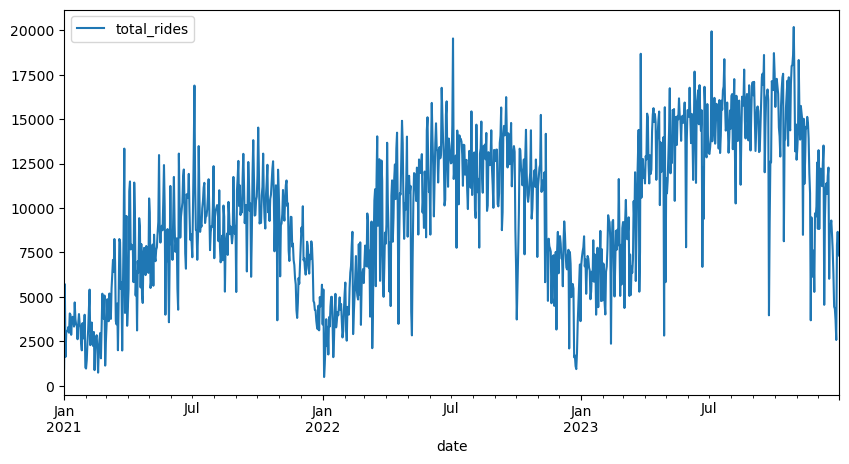

In [21]:
# Create quick graph with overview of total rides per day
df_daily_weather.plot(x='date', y='total_rides', kind='line', figsize=(10, 5))

# import matplotlib
# import matplotlib.pyplot as plt
# matplotlib.style.use("seaborn-white")
# plt.rcParams["figure.figsize"] = (8.8, 3.6)

# ax = df.plot(x="Date", y="Vehicles per day")


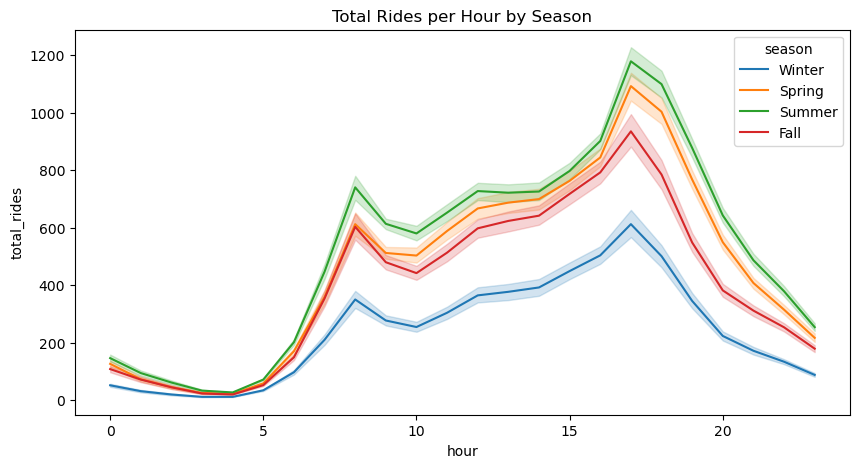

In [22]:
# Create quick graph with overview of total rides per day
plt.figure(figsize=(10, 5))
sns.lineplot(data=df_hourly_weather, x='hour', y='total_rides', hue='season')
plt.title('Total Rides per Hour by Season')
plt.show()

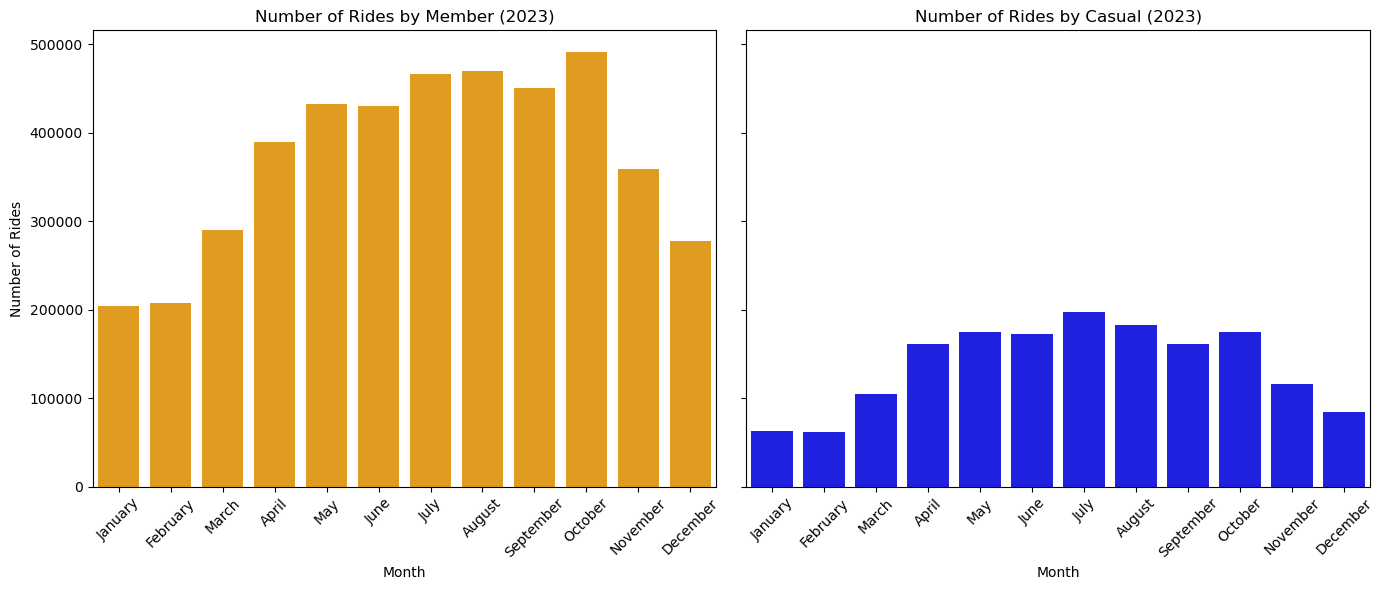

In [29]:
# Sort the months in calendar order
monthly_rides['month'] = pd.Categorical(
    monthly_rides['month'], 
    categories=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], 
    ordered=True
)
monthly_rides = monthly_rides.sort_values('month')

# Create two plots side by side
fig, axs = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Plot for 'member' on the left
sns.barplot(data=monthly_rides, x='month', y='total_rides', ax=axs[0], color='orange')
axs[0].set_title('Number of Rides by Member (2023)')
axs[0].set_xlabel('Month')
axs[0].set_ylabel('Number of Rides')
axs[0].tick_params(axis='x', rotation=45)

# Plot for 'casual' on the right
sns.barplot(data=monthly_rides, x='month', y='casual', ax=axs[1], color='blue')
axs[1].set_title('Number of Rides by Casual (2023)')
axs[1].set_xlabel('Month')
axs[1].set_ylabel('')  # Remove duplicate y-axis label
axs[1].tick_params(axis='x', rotation=45)

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

<Figure size 1400x600 with 0 Axes>

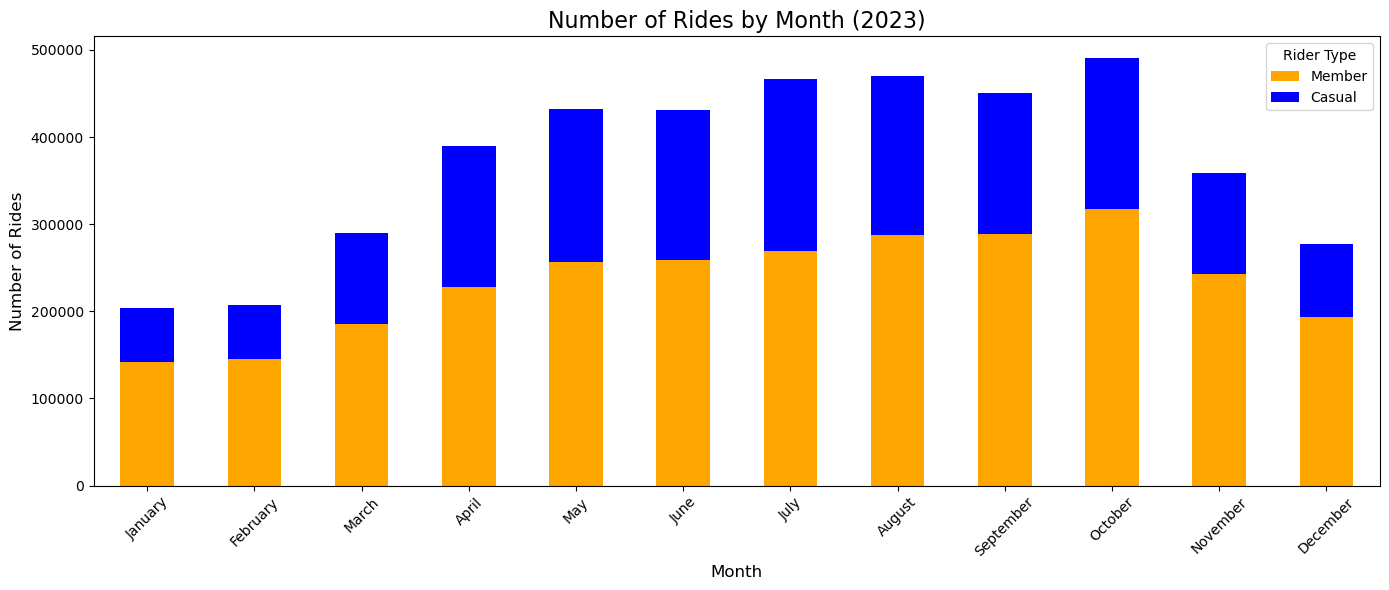

In [31]:
# Plot the stacked bar chart with reversed order of member and casual
plt.figure(figsize=(14, 6))
monthly_rides.set_index('month')[['member', 'casual']].plot(
    kind='bar', 
    stacked=True, 
    color=['orange', 'blue'], 
    figsize=(14, 6)
)

# Add labels and title
plt.title('Number of Rides by Month (2023)', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Rides', fontsize=12)
plt.xticks(rotation=45)
plt.legend(['Member', 'Casual'], title='Rider Type')

# Show the plot
plt.tight_layout()
plt.show()


<Figure size 1400x600 with 0 Axes>

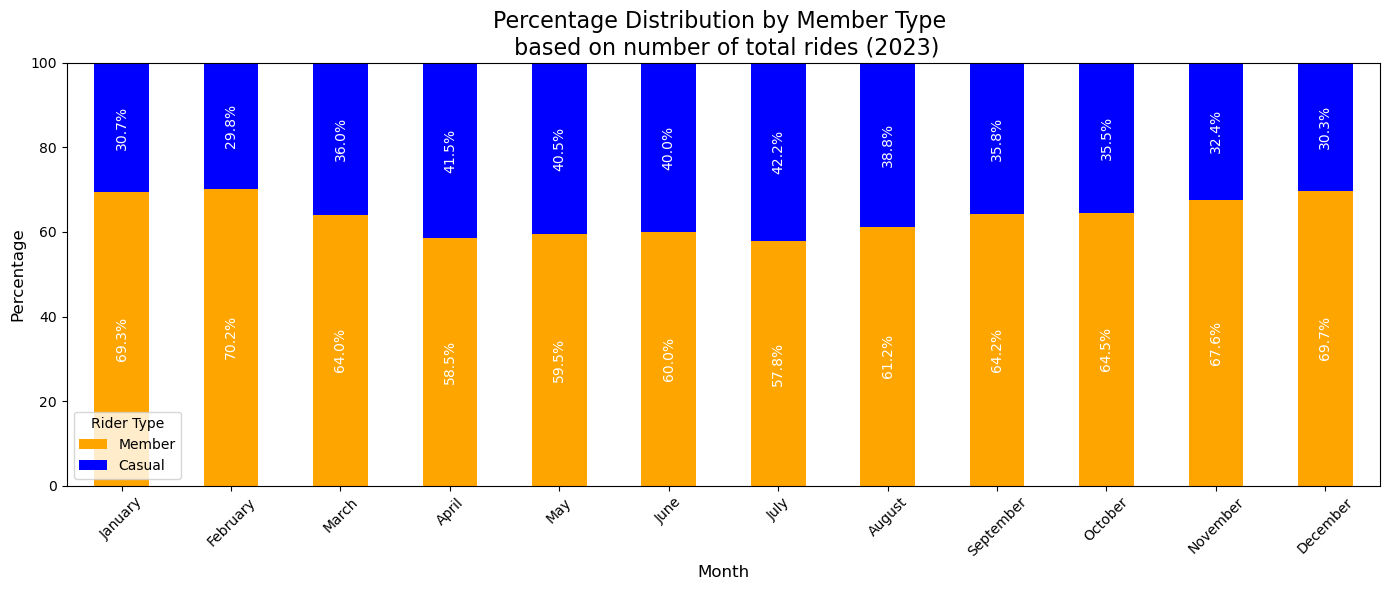

In [36]:
# Calculate percentage split for casual and member
monthly_rides['casual_percentage'] = (monthly_rides['casual'] / monthly_rides['total_rides']) * 100
monthly_rides['member_percentage'] = (monthly_rides['member'] / monthly_rides['total_rides']) * 100

# Plot the stacked bar chart with percentage split
plt.figure(figsize=(14, 6))
ax = monthly_rides.set_index('month')[['member_percentage', 'casual_percentage']].plot(
    kind='bar', 
    stacked=True, 
    color=['orange', 'blue'], 
    figsize=(14, 6)
)

# Add labels and title
plt.title('Percentage Distribution by Member Type \n based on number of total rides (2023)', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Percentage', fontsize=12)
plt.xticks(rotation=45)
plt.legend(['Member', 'Casual'], title='Rider Type')

# Adjust y-axis to show percentage
plt.ylim(0, 100)

# Add percentage values inside the bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    if height > 0:  # Avoid displaying text for zero-height bars
        ax.text(x + width / 2, y + height / 2, f'{height:.1f}%', 
                ha='center', va='center', rotation=90, fontsize=10, color='white')

# Show the plot
plt.tight_layout()
plt.show()

In [23]:
# Have dots on days of holidays...

# df["Holiday traffic"] = df["Vehicles per day"][df["Date"].apply(lambda d: d in uk_holidays)]
# ax = df.plot(x="Date", y=["Vehicles per day", "Holiday traffic"], style=["-", "o"])


In [24]:
# Create a new column with member yes/no
df_daily_weather['member'] = np.where(df_daily_weather['member'] > 0, 'yes', 'no')

C:\Users\MP_Laptop\AppData\Local\Temp\ipykernel_3932\2019339733.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


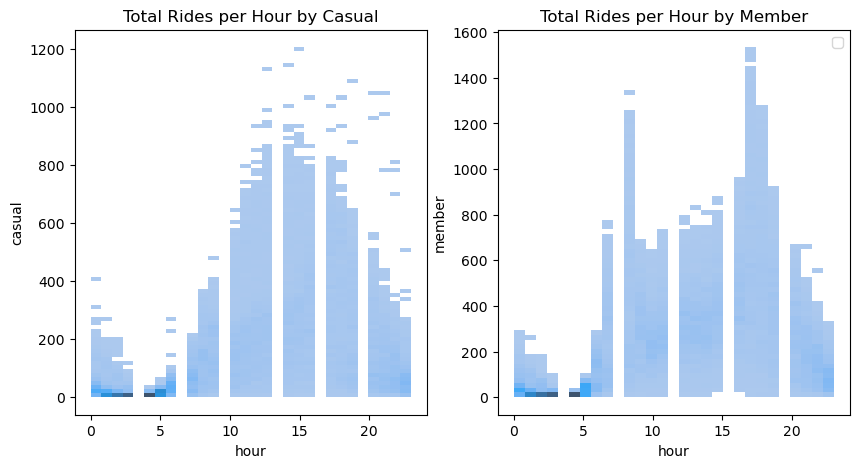

In [25]:
# Create two plots next to each other with total rides per day by member and by casual
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.histplot(data=df_hourly_weather, x='hour', y='casual')
plt.title('Total Rides per Hour by Casual')

plt.subplot(1, 2, 2)
sns.histplot(data=df_hourly_weather, x='hour', y='member')
plt.title('Total Rides per Hour by Member')
plt.legend()
plt.show()


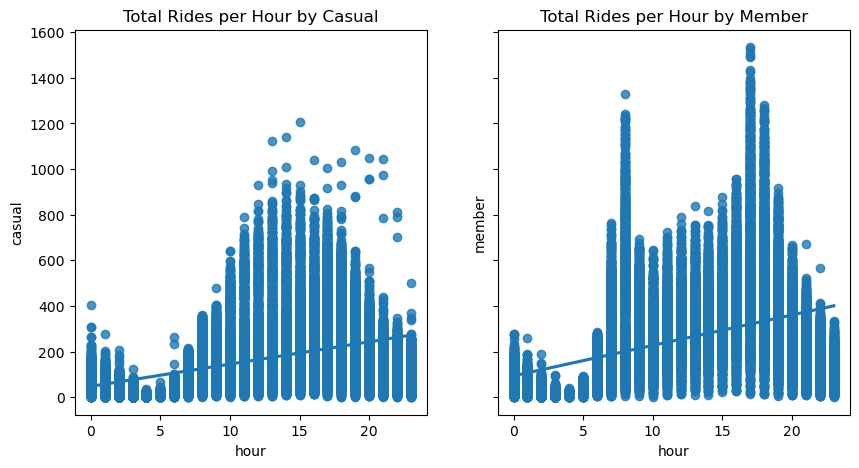

In [26]:
# Wahrscheinlich besser mit regression plot, weil er aktuell die ganzen Tage versucht zu plotten
# Create two plots next to each other with total rides per day by member and by casual
fig, axs = plt.subplots(1,2,figsize=(10,5), sharey=True)

plt.subplot(1, 2, 1)
sns.regplot(data=df_hourly_weather, x='hour', y='casual')
plt.title('Total Rides per Hour by Casual')

plt.subplot(1, 2, 2)
sns.regplot(data=df_hourly_weather, x='hour', y='member')
plt.title('Total Rides per Hour by Member')

plt.show()

In [27]:
#Check for duplicates
df.duplicated().sum()

NameError: name 'df' is not defined

In [ ]:
string_col = df.select_dtypes(include="object").columns

In [ ]:
df[string_col].head()

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
0,M,ATA,Normal,N,Up
1,F,NAP,Normal,N,Flat
2,M,ATA,ST,N,Up
3,F,ASY,Normal,Y,Flat
4,M,NAP,Normal,N,Up


In [ ]:
for col in string_col:
    print(f"The distribution of categorical values in the {col} is : ")
    print(df[col].value_counts())

The distribution of categorical values in the Sex is : 
Sex
M    725
F    193
Name: count, dtype: int64
The distribution of categorical values in the ChestPainType is : 
ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64
The distribution of categorical values in the RestingECG is : 
RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: int64
The distribution of categorical values in the ExerciseAngina is : 
ExerciseAngina
N    547
Y    371
Name: count, dtype: int64
The distribution of categorical values in the ST_Slope is : 
ST_Slope
Flat    460
Up      395
Down     63
Name: count, dtype: int64


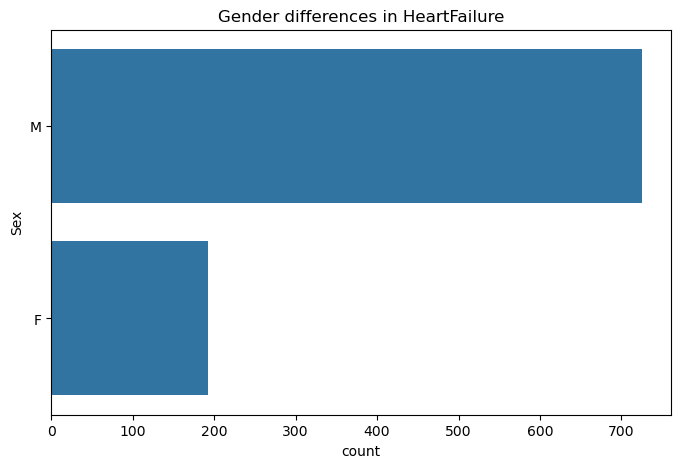

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(df['Sex'])
plt.title('Gender differences in HeartFailure')
plt.show()

Text(0.5, 1.0, 'The number of heart patients to healthy people')

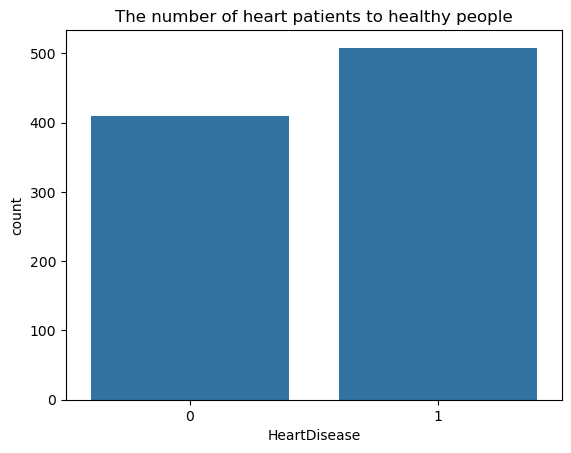

In [ ]:
sns.countplot(data=df,x='HeartDisease')
plt.title('The number of heart patients to healthy people')

In [ ]:
df.groupby(['Sex','HeartDisease'])['HeartDisease'].count()


Sex  HeartDisease
F    0               143
     1                50
M    0               267
     1               458
Name: HeartDisease, dtype: int64

In [ ]:
grouped_df = df.groupby(['Sex', 'HeartDisease'])['HeartDisease'].count().unstack()
grouped_df

HeartDisease,0,1
Sex,,
F,143,50
M,267,458


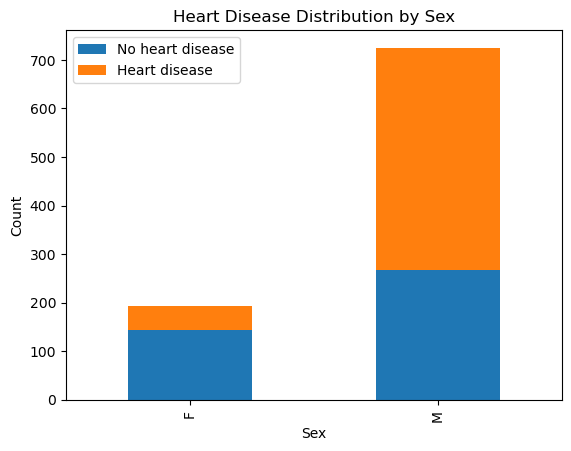

In [ ]:
grouped_df = df.groupby(['Sex', 'HeartDisease'])['HeartDisease'].count().unstack()

# Rename the columns (0 becomes "No heart disease" and 1 becomes "Heart disease")
grouped_df.columns = ['No heart disease', 'Heart disease']

# If you want to transpose the dataframe so that 'Heart disease' and 'No heart disease' are on the x-axis (fix labels then too!)
#grouped_df = grouped_df.T

# Plot a stacked bar chart
grouped_df.plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e'])

# Add labels and title
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Heart Disease Distribution by Sex')

# Show the plot
plt.show()

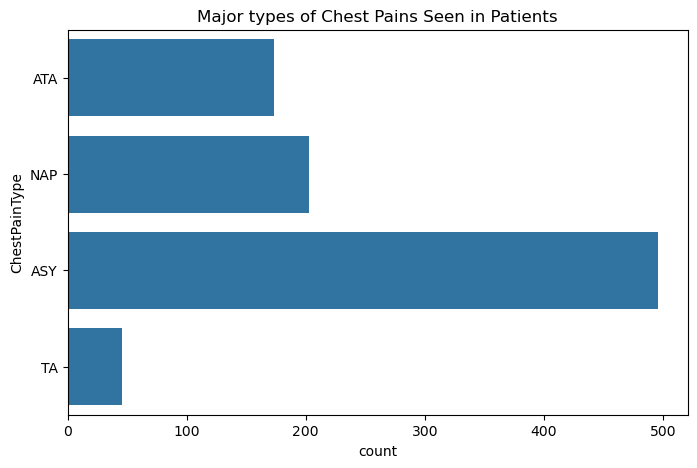

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(df['ChestPainType'])
plt.title('Major types of Chest Pains Seen in Patients')
plt.show()

In [ ]:
df.pivot_table(index='Sex',columns='RestingECG', values='HeartDisease', aggfunc='mean')

RestingECG,LVH,Normal,ST
Sex,,,
F,0.297872,0.245763,0.250000
M,0.652482,0.589862,0.733333


array([<Axes: ylabel='LVH'>, <Axes: ylabel='Normal'>, <Axes: ylabel='ST'>],
      dtype=object)

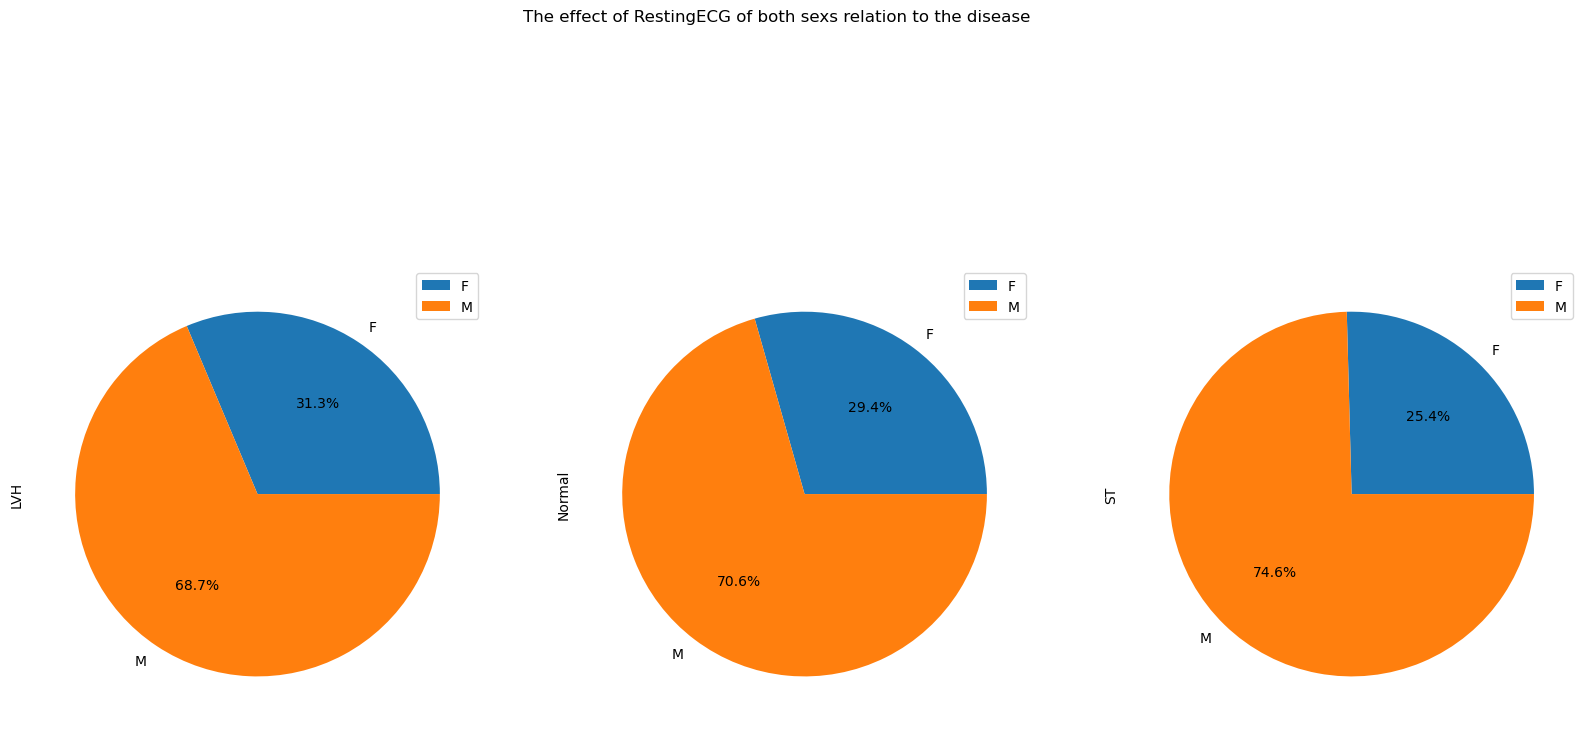

In [ ]:
df.pivot_table(
    index='Sex',
    columns='RestingECG', 
    values='HeartDisease',
    aggfunc='mean'
).plot.pie(
    subplots=True,
    figsize=(20,10),
    title='The effect of RestingECG of both sexs relation to the disease ',
    autopct ='%1.1f%%'
)

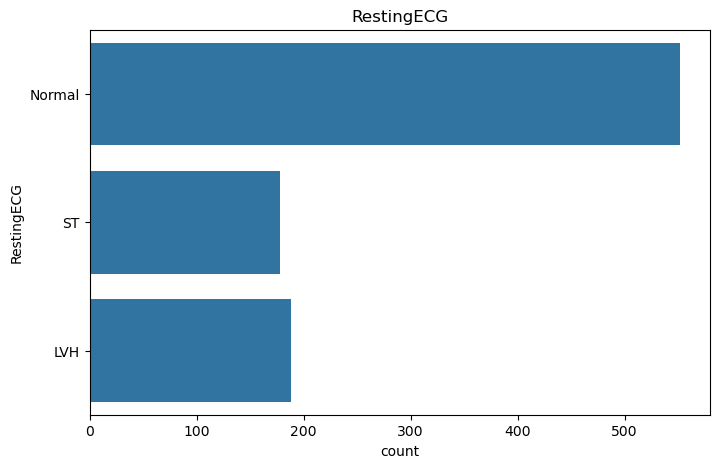

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(df['RestingECG'])
plt.title('RestingECG')
plt.show()

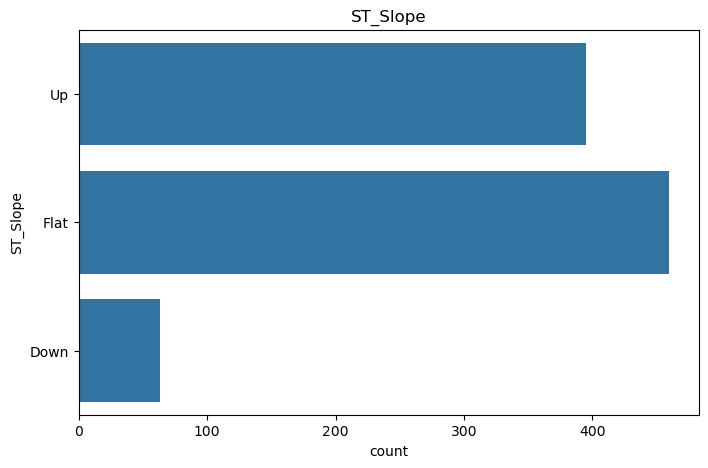

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(df['ST_Slope'])
plt.title('ST_Slope')
plt.show()

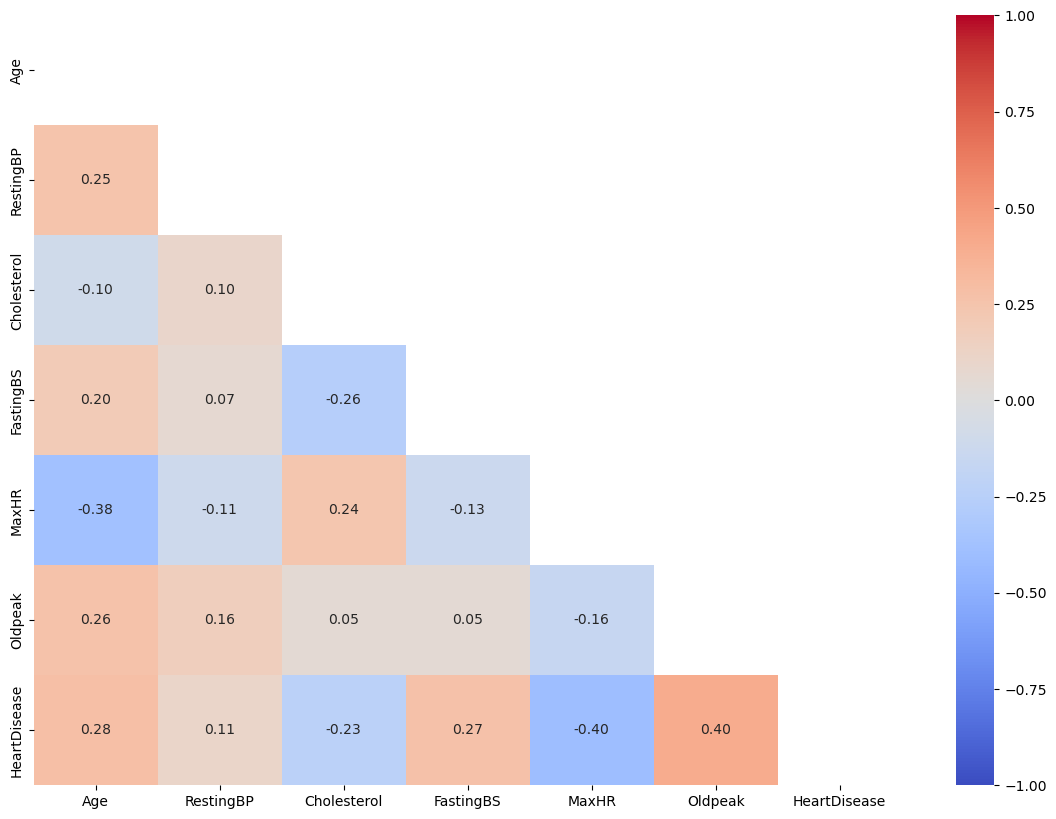

In [ ]:
numf= df.select_dtypes('number').columns


matrix = np.triu(df[numf].corr())
fig, ax = plt.subplots(figsize=(14,10))
sns.heatmap (df[numf].corr(), annot=True, fmt= '.2f', vmin=-1, vmax=1, center=0, cmap='coolwarm',mask=matrix, ax=ax);

In [ ]:
df.describe(include='O')


,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
count,918,918,918,918,918
unique,2,4,3,2,3
top,M,ASY,Normal,N,Flat
freq,725,496,552,547,460


In [ ]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


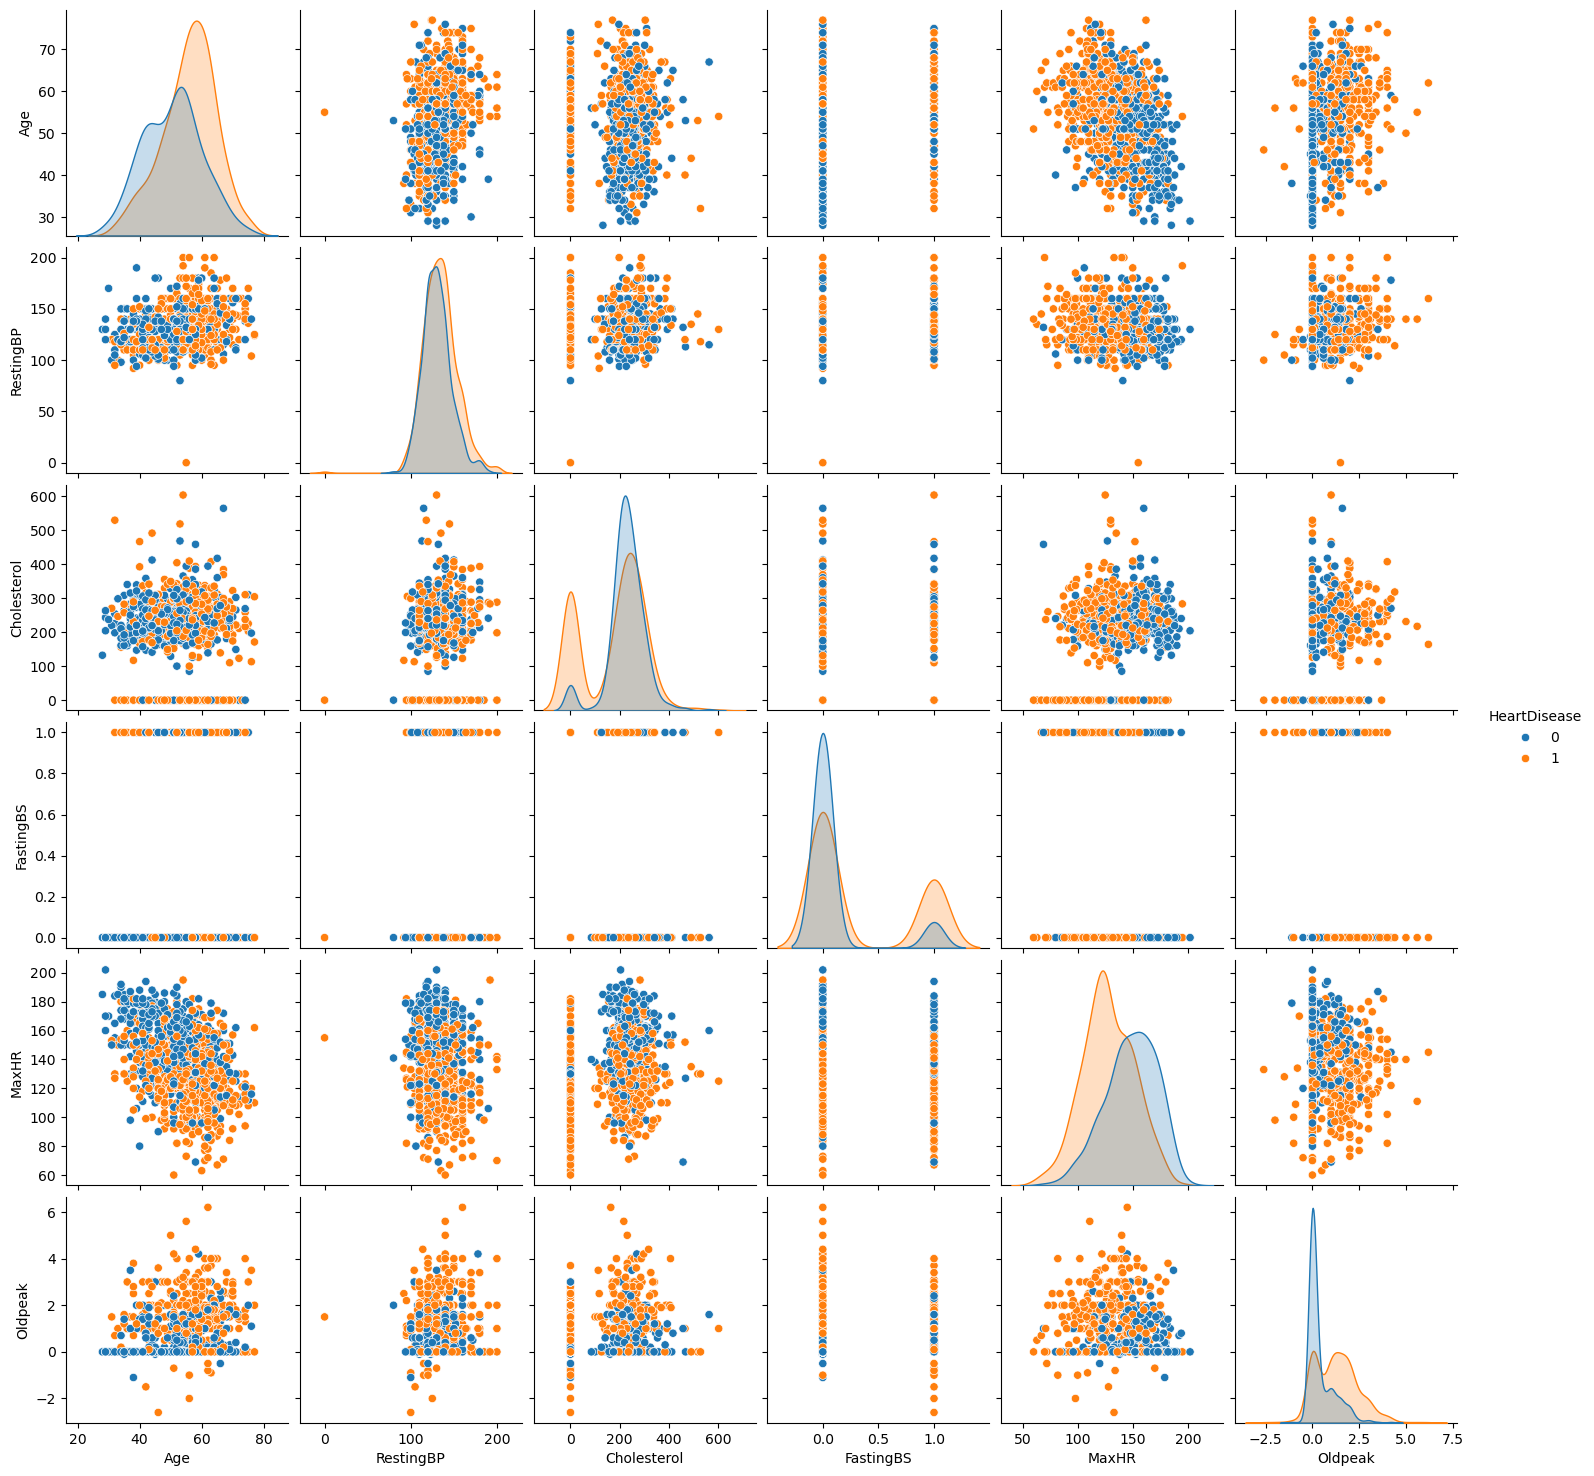

In [ ]:
sns.pairplot(data=df,hue='HeartDisease')


Text(0.5, 1.0, 'Distribution of maximum heart rate achieved by HeartDisease')

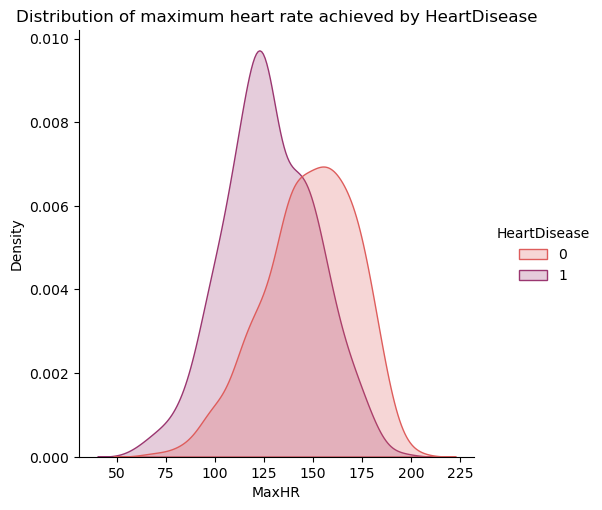

In [ ]:
sns.displot(data=df,x='MaxHR',hue='HeartDisease',palette='flare',kind='kde',fill=True)
plt.title('Distribution of maximum heart rate achieved by HeartDisease')

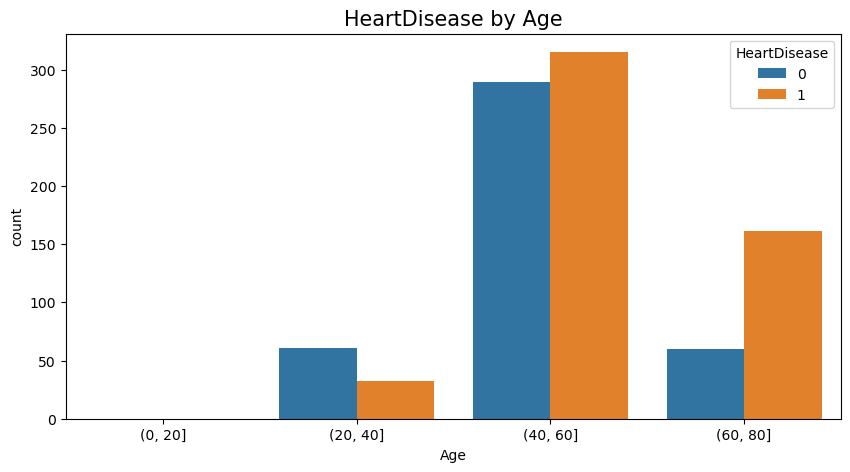

In [ ]:
plt.figure(figsize=(10,5))
bins=[0, 20, 40, 60, 80]
sns.countplot(x=pd.cut(df.Age,bins=bins),hue=df.HeartDisease)
plt.title("HeartDisease by Age", fontsize=15)
plt.show()

In [ ]:
colors = ['#9A9483', '#99A799', '#D3E4CD', '#26191B']


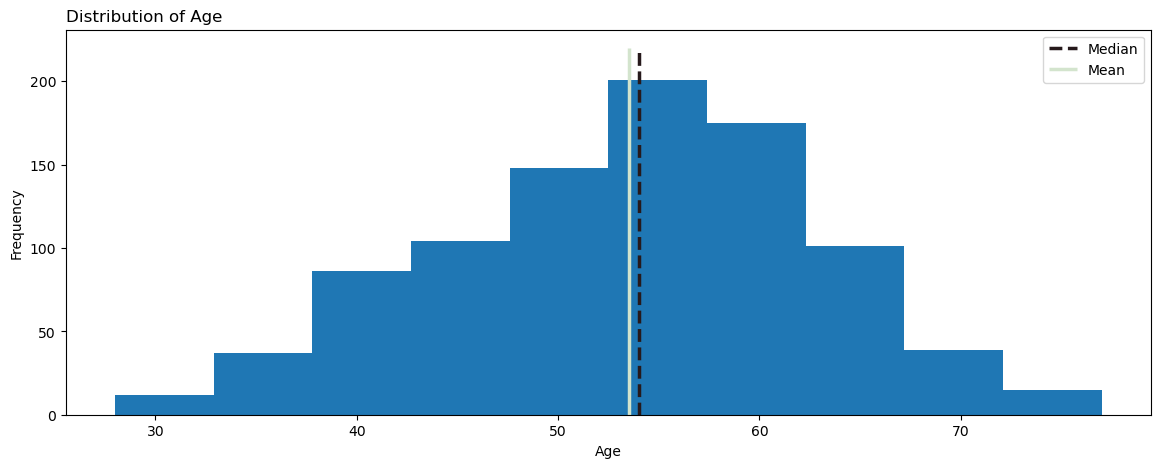

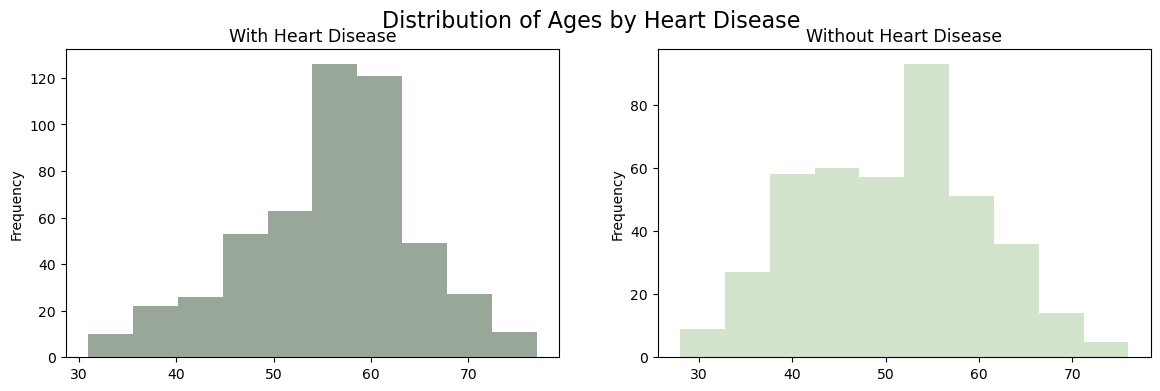

In [ ]:
# df preparation for distribution of ages.
ageMed=df.Age.median()
ageMean = df.Age.mean()

# grouped df by target feature 'HeartDisease'
group = df.groupby(by='HeartDisease')
hd_df = group.get_group(1)
nhd_df = group.get_group(0)

# selecting age by heart disease
a = hd_df['Age']
b = nhd_df['Age']

# plot
plt.figure(figsize=(14, 5))
plt.hist(df.Age,  ec=colors[-1])
plt.vlines(ageMed, ymin=0, ymax=220, color=colors[-1], ls='--', lw=2.5, label='Median')
plt.vlines(ageMean, ymin=0, ymax=220, color=colors[-2], lw=2.5, label='Mean')

plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title("Distribution of Age", loc='left')
plt.legend()

# subplots
fig, axs=plt.subplots(nrows=1, ncols=2, figsize=(14, 4))
ax1 = a.plot(kind='hist', ax=axs[0], ec=colors[-1], color=colors[1])
ax1.set_title('With Heart Disease', size=12.5)
ax2 = b.plot(kind='hist', ax=axs[1], ec=colors[-1], color=colors[2])
ax2.set_title('Without Heart Disease', size=12.5)

fig.suptitle('Distribution of Ages by Heart Disease', size=16, c='#000')
plt.show()

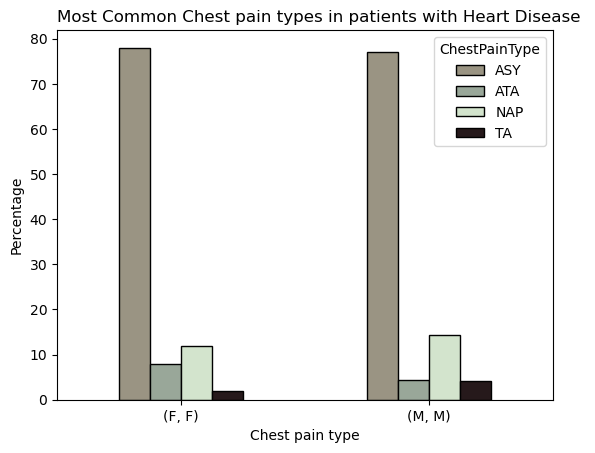

In [ ]:
# Most common chest pain in patients with heart disease.
a = hd_df.groupby(['Sex', 'ChestPainType'])['HeartDisease'].count()

# Calculate percentage distribution within each sex group.
a = a.groupby(level=0).apply(lambda x: 100 * x / x.sum())

# Unstack and plot
a.unstack().plot(kind='bar', ec='#000', color=colors)

plt.xlabel('Chest pain type')
plt.ylabel('Percentage')
plt.title("Most Common Chest pain types in patients with Heart Disease ", loc='left')

plt.xticks(rotation=0)
plt.show()
